In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns

from dblib import mssql

sns.set()

#gey = ["#FFFFFF", "#999999", "#666666", "#333333", "#000000"]
#grey = ["#FFFFFF", "#111111"]
#sns.set_palette(sns.color_palette("cubehelix", 8))

sns.set(font="Times New Roman", font_scale=1, rc={"lines.linewidth": 0.4})
sns.set_style('ticks') #rc={'axes.grid':True}

In [3]:
sql="select Platform ,CNN ,Scale ,abs(error_perc) as [MAE Percent] from v_mv_imgscales_all where not error is null"
with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

#This next data is for the second axis,



['Platform', 'CNN', 'Scale', 'MAE Percent']

In [76]:
#mv_scale_score_low_high_cnts.sql

#Load Afloat
sql="select 'Valid' as Detections, good.scale as Scale, (good_cnt/(good_cnt+bad_cnt+0.000001))*100 as [Valid %] from ( select count(*) as good_cnt ,scale from v_mv_imgscales_all where score>=0.5 and Platform='Afloat' group by scale ) as good inner join ( select count(*) as bad_cnt, scale from v_mv_imgscales_all where score<0.5 and Platform='Afloat' group by scale) as bad on good.scale=bad.scale order by scale asc "
with mssql.Conn('imagedb', '(local)') as cnn:
    df_afloat = pd.read_sql(sql, cnn)

#Load Shore
sql="select 'Valid' as Detections, good.scale as Scale,(good_cnt/(good_cnt+isnull(bad_cnt,0)+0.000001))*100 as [Valid %] from ( select count(*) as good_cnt ,scale from v_mv_imgscales_all where score>=0.5 and Platform='Shore' group by scale ) as good left join ( select count(*) as bad_cnt, scale from v_mv_imgscales_all where score<0.5 and Platform='Shore' group by scale) as bad on good.scale=bad.scale order by scale asc "
with mssql.Conn('imagedb', '(local)') as cnn:
    df_shore = pd.read_sql(sql, cnn)

list(df_shore)
#print(df_shore.Valid, df_shore.Scale)



['Detections', 'Scale', 'Valid %']

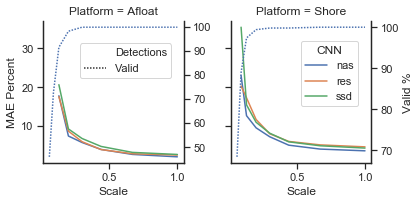

In [111]:
all_xticks = [0.04,0.06,0.09,0.13,0.2,0.3,0.44,0.67,1]

#https://matplotlib.org/users/colors.html
#https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
color = ['0.5', 'b', 'g']
#d = {'color': color , 'ls' : ["None", "None", "None"]}

g = sns.FacetGrid(df, col='Platform', hue='CNN', hue_kws={'markers':['+','o','-']}) #, hue_kws=d
g.map(sns.lineplot, 'Scale', 'MAE Percent', ci=None, markers=True)
#g.add_legend();
#g.set_xticklabels(rotation=90)
#g.set(xticks=all_xticks) 
plt.legend(loc=(0.5,0.4), title='CNN')
axAfloat = g.axes[0,0]
axShore = g.axes[0,1]

axAfloat1 = axAfloat.twinx()
sns.lineplot(x="Scale", y="Valid %", style="Detections", data=df_afloat, ax=axAfloat1, dashes={'Valid':(1,1)})
y_ax = axAfloat1.axes.get_yaxis()
y_lbl = y_ax.get_label()
y_lbl.set_visible(False)
plt.legend(loc=(0.26,0.6), title='')

axShore1 = axShore.twinx()
sns.lineplot(x="Scale", y="Valid %", style="Detections", data=df_shore, ax=axShore1, dashes={'Valid':(1,1)})
axShore1.legend_.remove()
plt.tight_layout()
sns.despine(top=True, right=False)


plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/scale_and_det.jpg', dpi=500)